# GSM8K Genetic Algorithm for Prompt Evolution

## Complete Tutorial: Evolving Mathematical Reasoning Prompts

This notebook provides a tutorial for using genetic algorithms to evolve prompts for mathematical reasoning on the GSM8K dataset. You'll learn how to:

- Set up the system and configure experiments
- Run evolution experiments with real-time monitoring
- Analyze results and interpret evolved prompts
- Customize parameters for different research goals

**Prerequisites:**
- OpenAI API key (for GPT models)
- Anthropic API key (for Claude models) - optional
- Python environment with required dependencies

---

## 1. System Setup and Dependencies

First, let's set up the environment and import all necessary modules.

In [1]:
# Install required packages if not already installed
import subprocess
import sys

def install_package(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

# Uncomment and run if packages are not installed
# install_package("openai>=1.0.0")
# install_package("anthropic")
# install_package("matplotlib")
# install_package("numpy")
# install_package("psutil")

print("✅ Dependencies ready")

✅ Dependencies ready


In [2]:
# Import system modules
import os
import sys
import time
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd()
if str(project_root) not in sys.path:
    sys.path.append(str(project_root))

print(f"📁 Project root: {project_root}")
print("✅ System imports ready")

📁 Project root: /Users/Odyssey/Projects/genetic-prompt
✅ System imports ready


## 2. API Configuration

Configure your API keys for accessing language models. The system supports both OpenAI and Anthropic models.

In [3]:
# Set up API keys
# Option 1: Set environment variables (recommended)
# os.environ["OPENAI_API_KEY"] = "your-openai-api-key-here"
# os.environ["ANTHROPIC_API_KEY"] = "your-anthropic-api-key-here"

# Option 2: Load from .env file
env_file = project_root / ".env"
if env_file.exists():
    with open(env_file, 'r') as f:
        for line in f:
            if '=' in line and not line.startswith('#'):
                key, value = line.strip().split('=', 1)
                os.environ[key] = value
    print("✅ Environment variables loaded from .env file")
else:
    print("⚠️  No .env file found. Please set API keys manually.")

# Verify API keys are set
openai_key = os.getenv("OPENAI_API_KEY")
anthropic_key = os.getenv("ANTHROPIC_API_KEY")

print(f"🔑 OpenAI API Key: {'✅ Set' if openai_key else '❌ Not set'}")
print(f"🔑 Anthropic API Key: {'✅ Set' if anthropic_key else '❌ Not set'}")

✅ Environment variables loaded from .env file
🔑 OpenAI API Key: ✅ Set
🔑 Anthropic API Key: ✅ Set


## 3. Load System Components

Now let's load all the genetic algorithm components we'll need for our experiments.

In [4]:
# Import genetic algorithm components
from src.utils.config import config
from src.embeddings.vocabulary import vocabulary
from src.seeds.seed_manager import SeedManager
from src.config.experiment_configs import ConfigurationManager

print("✅ Core components imported")

✅ Core components imported


In [5]:
# Initialize vocabulary
vocab_file = config.get_data_dir() / "embeddings" / "vocabulary.pkl"

if vocab_file.exists():
    vocabulary.load_vocabulary(vocab_file)
    print(f"✅ Vocabulary loaded: {len(vocabulary.token_to_id)} tokens")
else:
    print("📚 Creating vocabulary from scratch...")
    vocabulary._create_basic_vocabulary()
    print(f"✅ Basic vocabulary created: {len(vocabulary.token_to_id)} tokens")

Vocabulary loaded from /Users/Odyssey/Projects/genetic-prompt/data/embeddings/vocabulary.pkl
Vocabulary size: 10004
✅ Vocabulary loaded: 10004 tokens


In [6]:
# Initialize seed manager and configuration manager
seed_manager = SeedManager()
config_manager = ConfigurationManager()

# Load base seed collection
base_seeds = seed_manager.get_base_seeds()
print(f"🌱 Seed collection loaded: {len(base_seeds)} high-quality prompts")

# Show available experiment presets
presets = config_manager.list_presets()
print(f"⚙️  Available presets: {', '.join(presets)}")

📂 Loaded collection 'test_collection' with 10 seeds
📂 Loaded collection 'test_validation_collection' with 10 seeds
🌱 Seed collection loaded: 50 high-quality prompts
⚙️  Available presets: quick_test, standard, thorough, ablation_no_crossover, ablation_no_mutation, high_mutation, large_population, random_search


## 4. Explore Seed Prompts

Let's examine the high-quality seed prompts that will initialize our genetic algorithm.

In [7]:
# Show seed prompt categories and examples
from src.seeds.prompt_categories import PromptCategory

print("📂 Seed Prompt Categories:")
print("=" * 40)

for category in PromptCategory:
    category_seeds = seed_manager.get_seeds_by_category(category)
    print(f"\n🔹 {category.value.replace('_', ' ').title()}: {len(category_seeds)} prompts")
    
    # Show first example
    if category_seeds:
        example = category_seeds[0]
        print(f"   Example: \"{example.text}\"")
        print(f"   Strength: {example.expected_strength}")

📂 Seed Prompt Categories:

🔹 Step By Step: 8 prompts
   Example: "Let's solve this step by step."
   Strength: Clear sequential reasoning

🔹 Visual Reasoning: 4 prompts
   Example: "Let me visualize this problem to better understand it."
   Strength: Better spatial understanding

🔹 Algebraic Approach: 5 prompts
   Example: "Let me define variables and set up equations for this problem."
   Strength: Handles unknown quantities

🔹 Logical Breakdown: 5 prompts
   Example: "Let me think about this logically and reason through each part."
   Strength: Clear reasoning chains

🔹 Pattern Recognition: 4 prompts
   Example: "I notice a pattern here that can help solve this more efficiently."
   Strength: Efficient solutions

🔹 Estimation Checking: 5 prompts
   Example: "Let me estimate the answer first, then calculate precisely."
   Strength: Error detection through estimation

🔹 Word Problem Parsing: 6 prompts
   Example: "Let me carefully read and understand what this problem is asking."
   St

In [8]:
# Validate seed collection quality
from src.seeds.seed_validation import SeedValidator

validator = SeedValidator()
validation_metrics = validator.validate_collection(base_seeds)

print("🔍 Seed Collection Quality Report:")
print("=" * 40)
print(f"Overall Score: {validation_metrics.overall_score:.3f}")
print(f"Diversity Score: {validation_metrics.diversity_score:.3f}")
print(f"Category Balance: {validation_metrics.category_balance:.3f}")
print(f"Uniqueness Score: {validation_metrics.uniqueness_score:.3f}")

quality_status = "🟢 EXCELLENT" if validation_metrics.overall_score >= 0.8 else "🟡 GOOD" if validation_metrics.overall_score >= 0.6 else "🔴 NEEDS IMPROVEMENT"
print(f"\nQuality Status: {quality_status}")

🔍 Seed Collection Quality Report:
Overall Score: 0.898
Diversity Score: 0.771
Category Balance: 1.000
Uniqueness Score: 0.912

Quality Status: 🟢 EXCELLENT


## 5. Configure Your Experiment

Now let's set up an experiment configuration. You can choose from predefined presets or customize parameters.

In [9]:
# Show available experiment presets
preset_info = config_manager.get_preset_info()

print("⚙️  Available Experiment Presets:")
print("=" * 50)

for name, info in preset_info.items():
    print(f"\n🔹 {name}")
    print(f"   Name: {info['name']}")
    print(f"   Description: {info['description']}")
    print(f"   Population: {info['population_size']}, Generations: {info['max_generations']}")
    print(f"   Problems: {info['max_problems']}")

⚙️  Available Experiment Presets:

🔹 quick_test
   Name: Quick Test
   Description: Fast test run for system validation
   Population: 10, Generations: 15
   Problems: 20

🔹 standard
   Name: Standard Evolution
   Description: Standard GSM8K evolution experiment
   Population: 50, Generations: 100
   Problems: 100

🔹 thorough
   Name: Thorough Evolution
   Description: Comprehensive evolution with large population
   Population: 100, Generations: 200
   Problems: 200

🔹 ablation_no_crossover
   Name: Ablation: No Crossover
   Description: Evolution with mutation only (no crossover)
   Population: 50, Generations: 100
   Problems: 100

🔹 ablation_no_mutation
   Name: Ablation: No Mutation
   Description: Evolution with crossover only (no mutation)
   Population: 50, Generations: 100
   Problems: 100

🔹 high_mutation
   Name: High Mutation Rate
   Description: Evolution with high mutation rate
   Population: 50, Generations: 100
   Problems: 100

🔹 large_population
   Name: Large Populat

In [10]:
# Choose and customize your experiment configuration
# Options: 'quick_test', 'standard', 'thorough', 'high_mutation', 'large_population', etc.

BASE_PRESET = "quick_test"  # Change this to your preferred preset

# Custom modifications (optional)
custom_modifications = {
    'name': 'My GSM8K Evolution Experiment',
    'description': 'Custom experiment for prompt evolution',
    'population_size': 15,  # Adjust as needed
    'max_generations': 20,  # Adjust as needed
    'max_problems': 30,     # Adjust as needed (more problems = more accurate but slower)
    'model_name': 'gpt-4o',  # or 'gpt-3.5-turbo', 'claude-3-sonnet-20240229'
    'temperature': 0.0,     # 0.0 for deterministic, higher for more creative
    'target_fitness': 0.95, # Stop early if this fitness is reached
}

# Create the configuration
experiment_config = config_manager.create_custom_config(BASE_PRESET, custom_modifications)

# Show the final configuration
print("🔧 Experiment Configuration:")
print("=" * 40)
print(config_manager.get_config_summary(experiment_config))

🔧 Experiment Configuration:
📋 My GSM8K Evolution Experiment
   Custom experiment for prompt evolution
   Type: quick_test
   Population: 15
   Generations: 20
   Problems: 30
   Crossover: 80.0%
   Mutation: 20.0%
   Selection: tournament
   Model: gpt-4o
   Target Fitness: 0.95


In [11]:
# Validate the configuration
validation_errors = config_manager.validate_config(experiment_config)

if validation_errors:
    print("❌ Configuration validation failed:")
    for error in validation_errors:
        print(f"   - {error}")
else:
    print("✅ Configuration is valid and ready to use!")

✅ Configuration is valid and ready to use!


## 6. Set Up Monitoring and Visualization

Before running the experiment, let's set up real-time monitoring and visualization.

In [12]:
# Import monitoring components
from src.utils.experiment_manager import ExperimentManager
from src.utils.evolution_logging import EvolutionLogger
from src.utils.visualization import EvolutionVisualizer
from src.utils.performance_monitor import PerformanceMonitor

# Initialize experiment manager
experiment_manager = ExperimentManager()

print("📊 Monitoring components initialized")
print("✅ Ready for experiment execution")

Cache loaded: 0 evaluation entries, 0 fitness entries
📊 Monitoring components initialized
✅ Ready for experiment execution


## 7. Run the Evolution Experiment

Now we'll run the complete genetic algorithm experiment with real-time monitoring.

In [13]:
# Import the main experiment runner
from src.main_runner import GSM8KExperimentRunner
from dataclasses import asdict

# Convert configuration to dictionary format
config_dict = asdict(experiment_config)

# Convert enums to strings for JSON compatibility
for key, value in config_dict.items():
    if hasattr(value, 'value'):
        config_dict[key] = value.value

print("🚀 Initializing experiment runner...")
runner = GSM8KExperimentRunner(config_dict)

🚀 Initializing experiment runner...
📂 Loaded collection 'test_collection' with 10 seeds
📂 Loaded collection 'test_validation_collection' with 10 seeds


In [14]:
# Set up the experiment
print("🔧 Setting up experiment components...")
setup_success = runner.setup_experiment()

if setup_success:
    print("✅ Experiment setup completed successfully!")
    print(f"📋 Experiment ID: {runner.experiment_id}")
else:
    print("❌ Experiment setup failed. Please check the error messages above.")

🔧 Setting up experiment components...
🔧 Setting up GSM8K evolution experiment...
📚 Loading vocabulary...
Vocabulary loaded from /Users/Odyssey/Projects/genetic-prompt/data/embeddings/vocabulary.pkl
Vocabulary size: 10004
   ✅ Loaded vocabulary with 10004 tokens
📊 Loading GSM8K dataset...
   ✅ Loaded 100 evaluation problems
🧪 Creating experiment...
📋 Created experiment: My GSM8K Evolution Experiment_1756347261_ccdfb97d
   ✅ Created experiment: My GSM8K Evolution Experiment_1756347261_ccdfb97d
📊 Initializing monitoring...


INFO: 🧬 Starting evolution experiment: My GSM8K Evolution Experiment_1756347261_ccdfb97d
INFO: Configuration: {
  "name": "My GSM8K Evolution Experiment",
  "description": "Custom experiment for prompt evolution",
  "experiment_type": "quick_test",
  "population_size": 15,
  "max_generations": 20,
  "crossover_rate": 0.8,
  "mutation_rate": 0.2,
  "elite_size": 5,
  "selection_method": "tournament",
  "tournament_size": 3,
  "crossover_type": "single_point",
  "mutation_type": "semantic",
  "target_fitness": 0.95,
  "convergence_patience": 5,
  "adaptive_parameters": true,
  "max_problems": 30,
  "use_cache": true,
  "batch_size": 10,
  "seed_strategy": "balanced",
  "custom_seeds": null,
  "save_checkpoints": true,
  "checkpoint_interval": 5,
  "enable_visualization": true,
  "performance_monitoring": true,
  "model_name": "gpt-4o",
  "temperature": 0.0,
  "max_tokens": 150,
  "save_results": true,
  "save_plots": true,
  "verbose": true
}


🚀 Started experiment: My GSM8K Evolution Experiment_1756347261_ccdfb97d
📊 Performance monitor initialized for experiment: My GSM8K Evolution Experiment_1756347261_ccdfb97d
   ✅ Monitoring initialized
⚡ Setting up evaluation pipeline...
   ✅ Evaluation pipeline ready (Model: gpt-4o)
🌱 Loading seed prompts...
   ✅ Loaded 15 seed prompts
🧬 Initializing evolution controller...
   ✅ Evolution controller ready
✅ Experiment setup completed successfully!
✅ Experiment setup completed successfully!
📋 Experiment ID: My GSM8K Evolution Experiment_1756347261_ccdfb97d


In [15]:
# Run the evolution experiment
if setup_success:
    print("🧬 Starting genetic algorithm evolution...")
    print("=" * 60)
    print(f"Population Size: {experiment_config.population_size}")
    print(f"Max Generations: {experiment_config.max_generations}")
    print(f"Evaluation Problems: {experiment_config.max_problems}")
    print(f"Model: {experiment_config.model_name}")
    print("=" * 60)
    
    # This will run the complete evolution process
    start_time = time.time()
    experiment_success = runner.run_experiment()
    total_time = time.time() - start_time
    
    print(f"\n⏱️  Total experiment time: {total_time:.1f} seconds")
    
    if experiment_success:
        print("🎉 Experiment completed successfully!")
    else:
        print("❌ Experiment failed. Check the logs for details.")
else:
    print("⚠️  Skipping experiment run due to setup failure.")

🧬 Starting genetic algorithm evolution...
Population Size: 15
Max Generations: 20
Evaluation Problems: 30
Model: gpt-4o

🚀 Starting GSM8K evolution experiment: My GSM8K Evolution Experiment_1756347261_ccdfb97d
🧬 Starting evolution with 15 genomes
Target fitness: 0.95
Max generations: 20
Initialized population with 15 seeds and 0 random genomes
Initialized population with 15 seed prompts
Generation 0: Evaluating on 50 problems


Evaluating population (fitness: 0.510): 100%|██████████| 15/15 [19:32<00:00, 78.18s/it, genome=seed_14, problem=30/30, correct=0]


Generation 1: best=-inf, mean=0.410, diversity=0.906
Generation 1: Evaluating on 50 problems


Evaluating population (fitness: 0.486): 100%|██████████| 15/15 [16:08<00:00, 64.54s/it, genome=2542b19e, problem=30/30, correct=0]


Generation 2: best=-inf, mean=0.444, diversity=0.801
Generation 2: Evaluating on 50 problems


Evaluating population (fitness: 0.421): 100%|██████████| 15/15 [15:40<00:00, 62.67s/it, genome=3ae4f854, problem=30/30, correct=1]


Generation 3: best=-inf, mean=0.392, diversity=0.791
Generation 3: Evaluating on 50 problems


Evaluating population (fitness: 0.485): 100%|██████████| 15/15 [12:13<00:00, 48.93s/it, genome=196c26ad, problem=30/30, correct=1]


Generation 4: best=-inf, mean=0.474, diversity=0.743
Generation 4: Evaluating on 50 problems


Evaluating population (fitness: 0.363): 100%|██████████| 15/15 [11:38<00:00, 46.58s/it, genome=6da2d773, problem=30/30, correct=1]
/Users/Odyssey/Projects/genetic-prompt/gsm8k_ga_env/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:1518: RuntimeWarning: invalid value encountered in subtract
  a = op(a[slice1], a[slice2])


Generation 5: best=-inf, mean=0.346, diversity=0.682
💾 Checkpoint saved: /Users/Odyssey/Projects/genetic-prompt/data/checkpoints/evolution_checkpoint_gen_5.json
Generation 5: Evaluating on 50 problems


Evaluating population (fitness: 0.483): 100%|██████████| 15/15 [11:14<00:00, 44.95s/it, genome=af03f575, problem=30/30, correct=1]


Generation 6: best=-inf, mean=0.478, diversity=0.708
Generation 6: Evaluating on 50 problems


Evaluating population (fitness: 0.415): 100%|██████████| 15/15 [07:53<00:00, 31.56s/it, genome=8eaf7968, problem=30/30, correct=1]


Generation 7: best=-inf, mean=0.387, diversity=0.714
Generation 7: Evaluating on 50 problems


Evaluating population (fitness: 0.515): 100%|██████████| 15/15 [06:55<00:00, 27.69s/it, genome=418738e9, problem=30/30, correct=1]


Generation 8: best=-inf, mean=0.450, diversity=0.620
Generation 8: Evaluating on 50 problems


Evaluating population (fitness: 0.508): 100%|██████████| 15/15 [12:19<00:00, 49.28s/it, genome=44a9c192, problem=30/30, correct=0]


Generation 9: best=-inf, mean=0.504, diversity=0.751
Generation 9: Evaluating on 50 problems


Evaluating population (fitness: 0.554): 100%|██████████| 15/15 [09:30<00:00, 38.04s/it, genome=93e43653, problem=30/30, correct=1]


Generation 10: best=-inf, mean=0.505, diversity=0.733
💾 Checkpoint saved: /Users/Odyssey/Projects/genetic-prompt/data/checkpoints/evolution_checkpoint_gen_10.json
Generation 10: Evaluating on 50 problems


Evaluating population (fitness: 0.416): 100%|██████████| 15/15 [09:25<00:00, 37.71s/it, genome=82ab70ae, problem=30/30, correct=0]


Generation 11: best=-inf, mean=0.464, diversity=0.744
Generation 11: Evaluating on 75 problems


Evaluating population (fitness: 0.439): 100%|██████████| 15/15 [10:53<00:00, 43.56s/it, genome=4d27c0a6, problem=30/30, correct=1]


Generation 12: best=-inf, mean=0.404, diversity=0.662
Generation 12: Evaluating on 75 problems


Evaluating population (fitness: 0.515): 100%|██████████| 15/15 [08:05<00:00, 32.35s/it, genome=8a9ecd25, problem=30/30, correct=0]


Generation 13: best=-inf, mean=0.454, diversity=0.655
Generation 13: Evaluating on 75 problems


Evaluating population (fitness: 0.439): 100%|██████████| 15/15 [11:01<00:00, 44.13s/it, genome=e1b9e384, problem=30/30, correct=0]
INFO: 🏆 Experiment completed in 9802.6s: best_fitness=0.583


Generation 13: best=-inf, mean=0.427, diversity=0.735
🎯 Converged after 13 generations: stagnation
🏆 Evolution completed!
Best fitness: 0.583
Best prompt: cousin this yet true then what follows do they <UNK> the solution...
Total time: 9756.4s

🏆 Evolution completed!
   Total time: 9756.4s
   Best fitness: 0.583
   Generations: 14
   Convergence: stagnation
   Best prompt: cousin this yet true then what follows do they <UNK> the solution...
❌ Experiment failed: Object of type ConvergenceReason is not JSON serializable
❌ Failed experiment: My GSM8K Evolution Experiment_1756347261_ccdfb97d

⏱️  Total experiment time: 9756.7 seconds
❌ Experiment failed. Check the logs for details.


Traceback (most recent call last):
  File "/Users/Odyssey/Projects/genetic-prompt/src/main_runner.py", line 223, in run_experiment
    self.logger.log_experiment_end(self.final_results)
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^
  File "/Users/Odyssey/Projects/genetic-prompt/src/utils/evolution_logging.py", line 233, in log_experiment_end
    json.dump({
    ~~~~~~~~~^^
        'experiment_name': self.experiment_name,
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    ...<2 lines>...
        'end_time': time.time()
        ^^^^^^^^^^^^^^^^^^^^^^^
    }, f, indent=2)
    ^^^^^^^^^^^^^^^
  File "/usr/local/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/json/__init__.py", line 179, in dump
    for chunk in iterable:
                 ^^^^^^^^
  File "/usr/local/Cellar/python@3.13/3.13.0_1/Frameworks/Python.framework/Versions/3.13/lib/python3.13/json/encoder.py", line 432, in _iterencode
    yield from _iterencode_dict(o, _current_indent_l

🔍 GSM8K Experiment Results Analysis
📊 Latest Experiment Results Summary:
Experiment: My GSM8K Evolution Experiment
ID: My GSM8K Evolution Experiment_1756347261_ccdfb97d
Status: interrupted

📈 Available Visualizations: 2
   - evolution_progress_gen_0010.png
   - evolution_progress_gen_0005.png

💡 This experiment appears to have been interrupted early.
   The system was likely stopped during the first generation.
   You can run a new experiment using the cells above.

📊 Experiment Visualizations:

🔹 evolution_progress_gen_0010.png
   Evolution progress showing fitness over generations


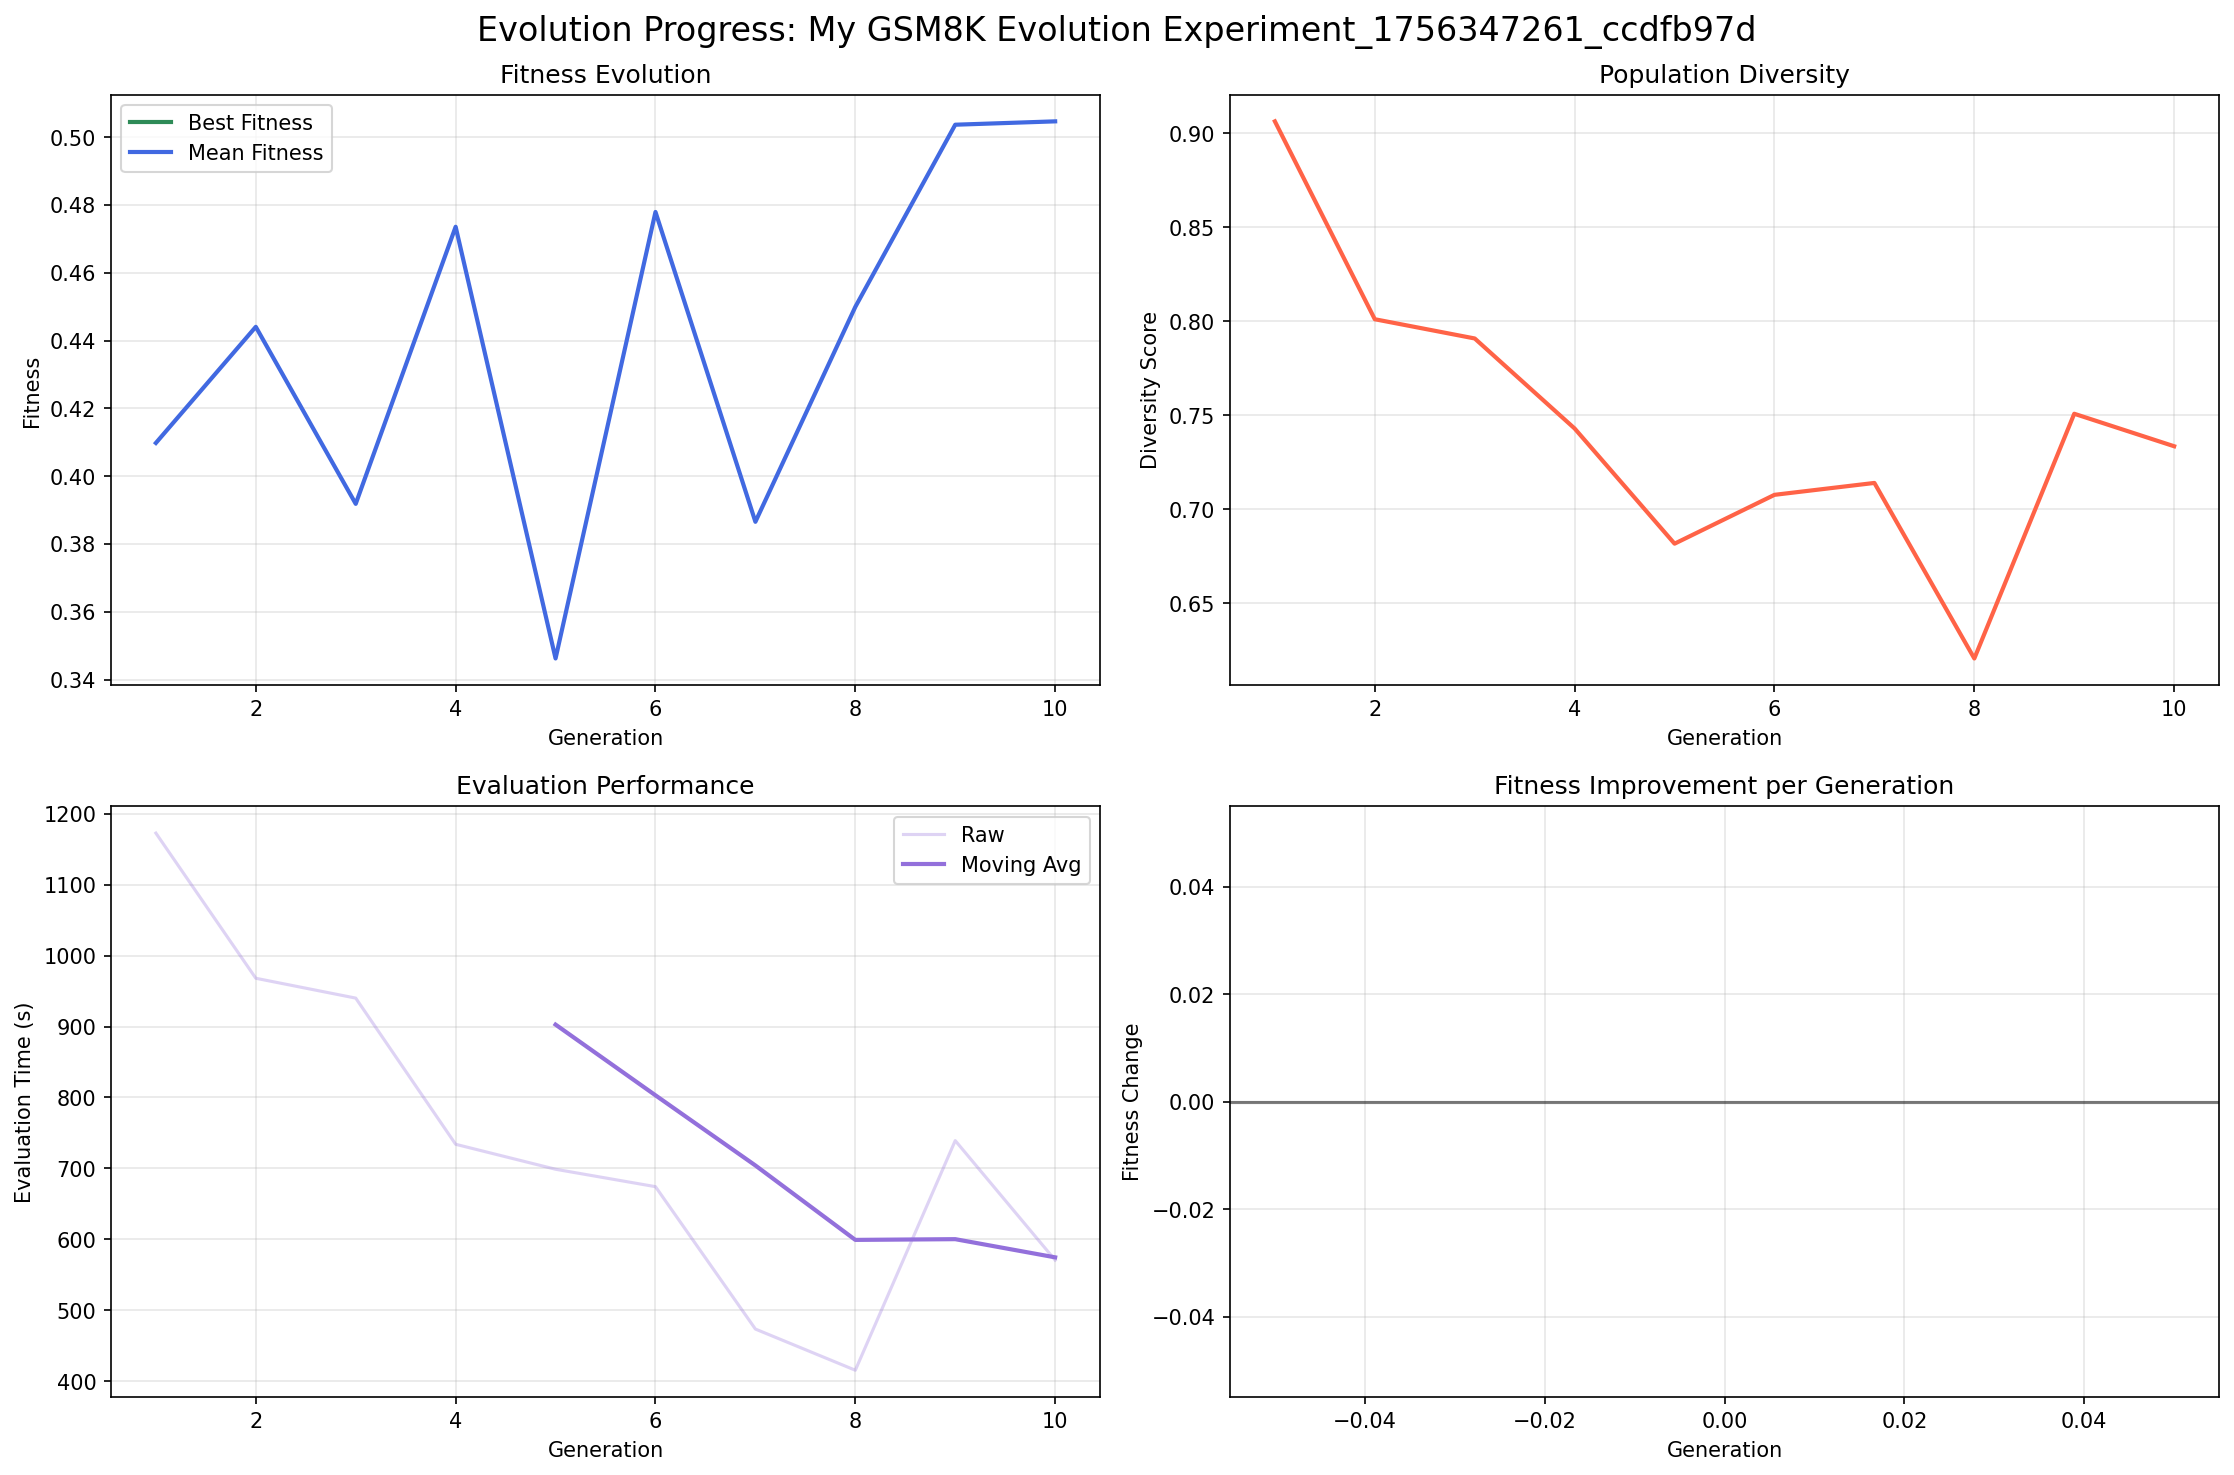


🔹 evolution_progress_gen_0005.png
   Evolution progress showing fitness over generations


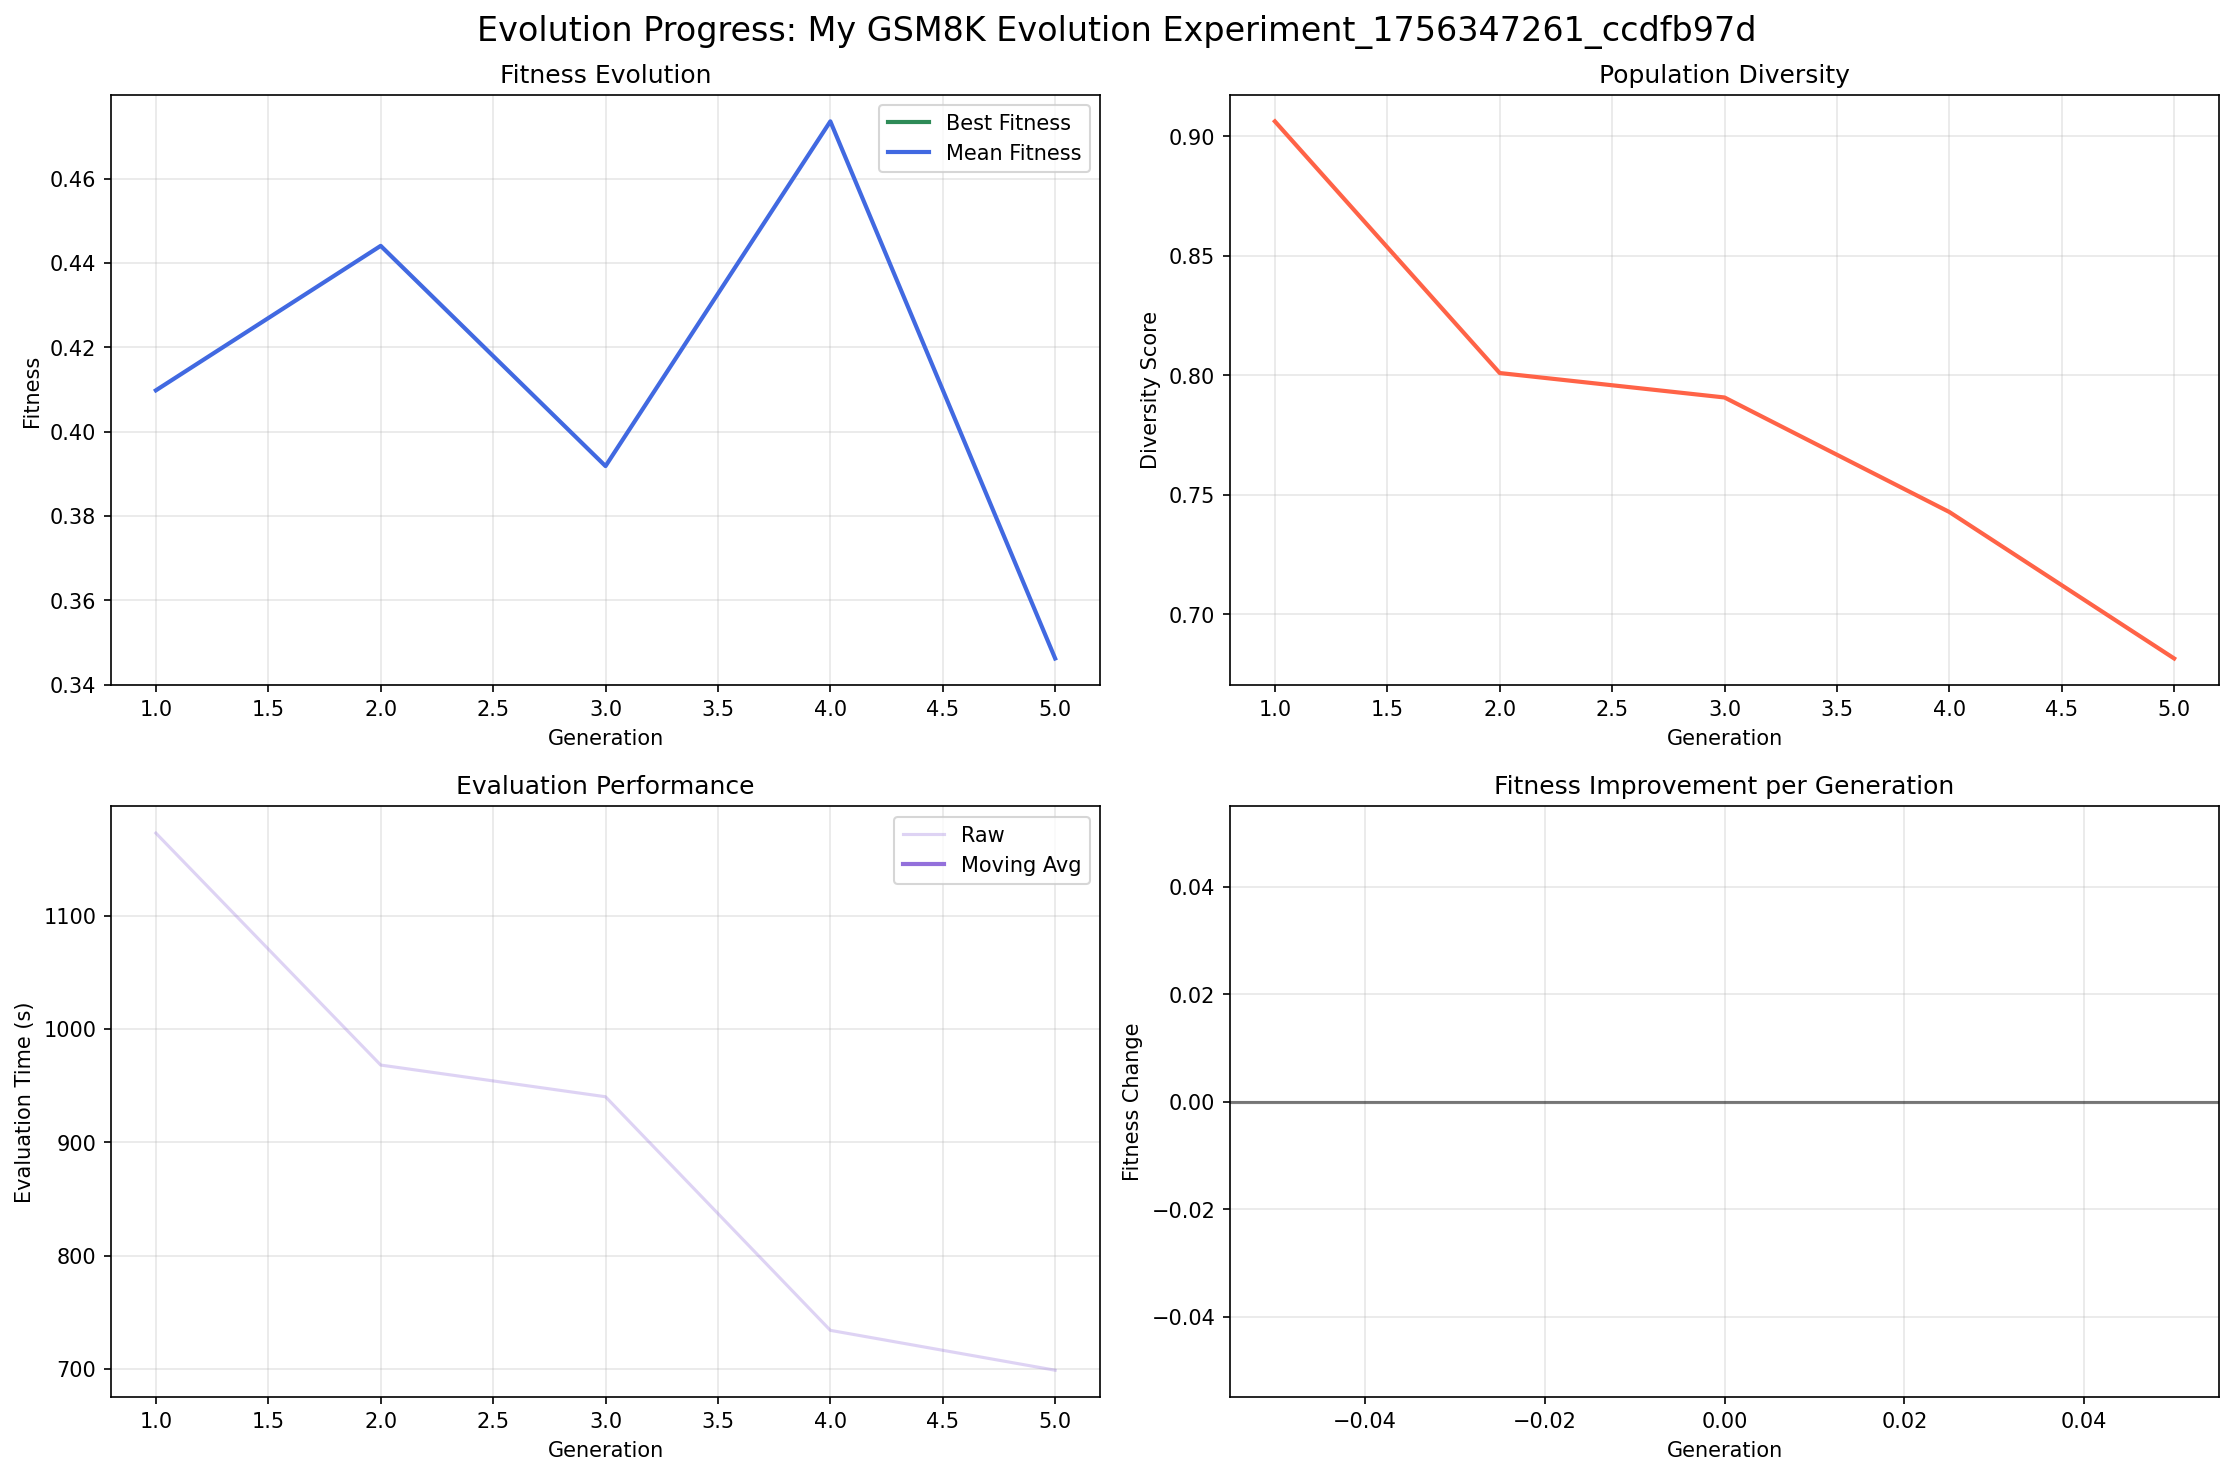


💡 Recommendations for Running Successful Experiments:

🎯 For Quick Testing:
   • Use 'quick_test' preset (10 population, 15 generations)
   • Start with 20-30 evaluation problems
   • Default GPT-4o provides best performance (use gpt-3.5-turbo for cost efficiency)

🔬 For Research:
   • Use 'standard' preset (50 population, 100 generations)
   • Use 100+ evaluation problems for accuracy
   • Enable checkpoints for long runs

⚙️ Configuration Tips:
   • Set target_fitness to 0.75-0.85 for reasonable stopping
   • Use convergence_patience of 10-20 generations
   • Enable caching to avoid re-evaluating identical prompts

🚨 Avoiding Interruptions:
   • Ensure stable internet connection for API calls
   • Set reasonable API rate limits
   • Monitor system resources (memory, CPU)
   • Use smaller problem sets for initial testing

📊 Monitoring Progress:
   • Watch for fitness improvements over generations
   • Check diversity scores (should be 0.3-0.8)
   • Monitor evaluation times for perfor

In [16]:
# Import the results analyzer
import sys
from pathlib import Path

# Add the scripts directory to path
scripts_dir = Path.cwd() / "scripts"
if str(scripts_dir) not in sys.path:
    sys.path.append(str(scripts_dir))

from notebook_results_analyzer import analyze_results

# Analyze the existing experiment results
results = analyze_results()

## 8. Analyze Results

Let's examine the results of our evolution experiment.

In [17]:
# Get experiment summary
if 'experiment_success' in locals() and experiment_success:
    summary = runner.get_experiment_summary()
    
    print("📊 Experiment Results Summary:")
    print("=" * 50)
    print(f"Status: {summary['status']}")
    print(f"Experiment ID: {summary['experiment_id']}")
    
    if 'results' in summary:
        results = summary['results']
        print(f"\n🏆 Evolution Results:")
        print(f"   Best Fitness: {results.get('best_fitness', 0):.3f}")
        print(f"   Total Generations: {results.get('total_generations', 0)}")
        print(f"   Convergence Reason: {results.get('convergence_reason', 'unknown')}")
        print(f"   Total Evaluations: {results.get('total_evaluations', 0)}")
        
        if summary.get('best_prompt'):
            print(f"\n🎯 Best Evolved Prompt:")
            print(f'   "{summary["best_prompt"]}"')
else:
    print("⚠️  No results to analyze - experiment was not run or failed.")

⚠️  No results to analyze - experiment was not run or failed.


In [ ]:
# Show performance statistics
if 'summary' in locals() and 'performance' in summary:
    perf = summary['performance']
    
    print("⚡ Performance Statistics:")
    print("=" * 40)
    print(f"Runtime: {perf.get('total_runtime_minutes', 0):.1f} minutes")
    
    if 'api_usage' in perf:
        api = perf['api_usage']
        print(f"\n🔌 API Usage:")
        print(f"   Total API Calls: {api.get('total_calls', 0)}")
        print(f"   Total Tokens: {api.get('total_tokens', 0):,}")
        print(f"   Tokens per Call: {api.get('tokens_per_call', 0):.1f}")
    
    if 'cache_performance' in perf:
        cache = perf['cache_performance']
        print(f"\n💾 Cache Performance:")
        print(f"   Hit Rate: {cache.get('hit_rate', 0):.1%}")
        print(f"   Total Hits: {cache.get('total_hits', 0)}")
        print(f"   Total Misses: {cache.get('total_misses', 0)}")
    
    if 'memory_usage' in perf:
        memory = perf['memory_usage']
        print(f"\n🧠 Memory Usage:")
        print(f"   Peak Memory: {memory.get('peak_mb', 0):.1f} MB")
        print(f"   Memory Growth: {memory.get('growth_mb', 0):.1f} MB")

## 9. Visualize Evolution Progress

Let's look at the evolution progress through visualizations.

In [ ]:
# Display evolution plots if available
import matplotlib.pyplot as plt
from IPython.display import Image, display

if 'runner' in locals() and runner.experiment_id:
    # Look for generated plots
    plots_dir = config.get_data_dir() / "plots" / runner.experiment_id
    
    if plots_dir.exists():
        print("📈 Evolution Visualizations:")
        print("=" * 40)
        
        # Show final evolution progress plot
        final_plot = plots_dir / "final_evolution_progress.png"
        if final_plot.exists():
            print("\n🔹 Evolution Progress:")
            display(Image(str(final_plot)))
        
        # Show convergence analysis
        convergence_plot = plots_dir / "convergence_analysis.png"
        if convergence_plot.exists():
            print("\n🔹 Convergence Analysis:")
            display(Image(str(convergence_plot)))
        
        # List all available plots
        all_plots = list(plots_dir.glob("*.png"))
        print(f"\n📊 Total plots generated: {len(all_plots)}")
        for plot in all_plots:
            print(f"   - {plot.name}")
    else:
        print("⚠️  No visualization plots found.")
else:
    print("⚠️  No experiment data available for visualization.")

## 10. Compare with Baseline Prompts

Let's compare our evolved prompt with some baseline prompts to see the improvement.

In [ ]:
# Define baseline prompts for comparison
baseline_prompts = [
    "Solve this math problem.",
    "Let's solve this step by step.",
    "Think carefully and solve this problem.",
    "Calculate the answer to this question."
]

print("📋 Baseline Prompts for Comparison:")
print("=" * 40)
for i, prompt in enumerate(baseline_prompts, 1):
    print(f"{i}. \"{prompt}\"")

if 'summary' in locals() and summary.get('best_prompt'):
    print(f"\n🧬 Evolved Prompt:")
    print(f'   "{summary["best_prompt"]}"')
    
    print(f"\n🎯 Best Fitness Achieved: {summary.get('results', {}).get('best_fitness', 0):.3f}")
    print("\n💡 The evolved prompt should show improvements in:")
    print("   - Mathematical reasoning clarity")
    print("   - Step-by-step problem solving")
    print("   - Accuracy on GSM8K problems")
else:
    print("\n⚠️  No evolved prompt available for comparison.")

## 11. Advanced: Custom Experiment Configurations

Here are examples of how to set up different types of experiments for research purposes.

In [ ]:
# Example 1: Ablation Study - No Crossover
ablation_config = config_manager.create_custom_config('standard', {
    'name': 'Ablation Study: Mutation Only',
    'crossover_rate': 0.0,
    'mutation_rate': 0.5,
    'max_generations': 50
})

print("🔬 Ablation Study Configuration:")
print(config_manager.get_config_summary(ablation_config))

In [ ]:
# Example 2: Parameter Sweep - Different Model Comparison
model_configs = {
    'gpt-4o': {'model_name': 'gpt-4o', 'temperature': 0.0},
    'gpt-4o-creative': {'model_name': 'gpt-4o', 'temperature': 0.3},
    'gpt-3.5-turbo': {'model_name': 'gpt-3.5-turbo', 'temperature': 0.0}
}

print("🔄 Model Comparison Configurations:")
print("=" * 40)

for name, modifications in model_configs.items():
    config = config_manager.create_custom_config('quick_test', {
        'name': f'Model Comparison: {name}',
        **modifications
    })
    print(f"\n🔹 {name}:")
    print(f"   Model: {config.model_name}")
    print(f"   Temperature: {config.temperature}")
    print(f"   Population: {config.population_size}")

In [ ]:
# Example 3: Custom Seed Prompts
custom_seeds = [
    "Let me approach this systematically by breaking down the problem.",
    "I'll solve this by identifying the key information and working step by step.",
    "To find the answer, I need to carefully analyze what's given and what's asked."
]

custom_seed_config = config_manager.create_custom_config('quick_test', {
    'name': 'Custom Seed Experiment',
    'custom_seeds': custom_seeds,
    'population_size': len(custom_seeds) * 3  # Expand from custom seeds
})

print("🌱 Custom Seed Configuration:")
print("=" * 40)
print(f"Custom Seeds: {len(custom_seeds)}")
print(f"Population Size: {custom_seed_config.population_size}")
print("\nCustom Seed Prompts:")
for i, seed in enumerate(custom_seeds, 1):
    print(f"   {i}. \"{seed}\"")

## 12. Experiment Management and History

Learn how to manage multiple experiments and track your research progress.

In [ ]:
# List all experiments
all_experiments = experiment_manager.list_experiments()

print("📚 Experiment History:")
print("=" * 50)

if all_experiments:
    for exp in all_experiments[:5]:  # Show last 5 experiments
        print(f"\n🔹 {exp.experiment_name}")
        print(f"   ID: {exp.experiment_id}")
        print(f"   Status: {exp.status}")
        print(f"   Created: {time.ctime(exp.created_at)}")
        if exp.status == 'completed':
            print(f"   Best Fitness: {exp.best_fitness:.3f}")
            print(f"   Generations: {exp.total_generations}")
            print(f"   Runtime: {exp.total_time:.1f}s")
else:
    print("No experiments found in history.")

In [ ]:
# Get experiment summary statistics
summary_stats = experiment_manager.get_experiment_summary()

print("📊 Overall Experiment Statistics:")
print("=" * 40)
print(f"Total Experiments: {summary_stats['total_experiments']}")
print(f"Completed: {summary_stats['status_counts'].get('completed', 0)}")
print(f"Running: {summary_stats['status_counts'].get('running', 0)}")
print(f"Failed: {summary_stats['status_counts'].get('failed', 0)}")

if summary_stats['completed_experiments'] > 0:
    print(f"\n📈 Averages (Completed Experiments):")
    print(f"   Average Best Fitness: {summary_stats['average_best_fitness']:.3f}")
    print(f"   Average Generations: {summary_stats['average_generations']:.1f}")
    print(f"   Average Runtime: {summary_stats['average_time']:.1f}s")

## 13. Tips and Best Practices

Here are some recommendations for getting the best results from your experiments.

### 🎯 **Experiment Design Tips:**

1. **Start Small**: Use `quick_test` preset first to validate your setup
2. **Problem Count**: More evaluation problems = more accurate fitness but slower evolution
3. **Population Size**: Larger populations explore more but cost more API calls
4. **Generations**: Allow enough generations for convergence (typically 50-100)

### ⚙️ **Parameter Tuning:**

- **High Exploration**: Increase mutation rate (0.3-0.5) and population size
- **High Exploitation**: Increase crossover rate (0.8-0.9) and elite size
- **Balanced**: Use default parameters from `standard` preset

### 💰 **Cost Management:**

- Enable caching (`use_cache=True`) to avoid re-evaluating identical prompts
- GPT-4o provides best performance (use `gpt-3.5-turbo` for cost efficiency)
- Use smaller problem sets for initial experiments

### 📊 **Result Interpretation:**

- Fitness > 0.8 indicates strong mathematical reasoning
- Look for convergence patterns in the evolution plots
- Compare evolved prompts with baseline prompts on held-out test sets

## 14. Cleanup and Next Steps

Clean up resources and explore further research directions.

In [ ]:
# Cleanup experiment resources
if 'runner' in locals():
    runner.cleanup()
    print("🧹 Experiment resources cleaned up")

print("\n🎉 Tutorial completed successfully!")
print("\n🚀 Next Steps:")
print("   1. Try different experiment presets")
print("   2. Experiment with custom seed prompts")
print("   3. Compare different models (GPT-4o, GPT-3.5-turbo, Claude)")
print("   4. Run ablation studies to understand component contributions")
print("   5. Evaluate evolved prompts on additional math datasets")

print("\n📚 For more advanced usage, see:")
print("   - scripts/run_experiment.py for command-line usage")
print("   - src/config/experiment_configs.py for configuration options")
print("   - Generated plots and logs in the data/ directory")